In [1]:
import xarray as xr
import os
import cartopy.crs as ccrs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from rasterio.warp import transform
import glob

In [2]:
month  = 'August'

In [3]:
tar_dir = os.path.join('/home/disk/sipn/upload/seansipn/forecast',month)
os.chdir(tar_dir)

In [4]:
files = glob.glob('./*.tif')

In [5]:
ds = []
for (i, cf) in enumerate(files):
    da = xr.open_rasterio(cf)
    da = da.isel(band=0).drop('band')

    # Compute the lon/lat coordinates with rasterio.warp.transform
    ny, nx = len(da['y']), len(da['x'])
    x, y = np.meshgrid(da['x'], da['y'])

    # Rasterio works with 1D arrays
    lon, lat = transform(da.crs, {'init': 'EPSG:4326'},
                         x.flatten(), y.flatten())
    lon = np.asarray(lon).reshape((ny, nx))
    lat = np.asarray(lat).reshape((ny, nx))
    da.coords['lon'] = (('y', 'x'), lon)
    da.coords['lat'] = (('y', 'x'), lat)
    da.name = 'SIP'
    da = da.where(da!=da.attrs['nodatavals'])
    da.coords['valid_time'] = i
    ds.append(da)
ds_all = xr.concat(ds, dim='valid_time')


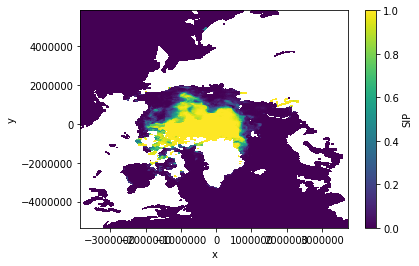

In [6]:
ds_all.mean(dim='valid_time').plot()

In [7]:
ds_all.to_netcdf('2018_it_'+month+'_vt_Sept.nc')